<a href="https://colab.research.google.com/github/lebrice/IFT6135/blob/master/A1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Come up with a CNN architecture with more or less similar number of parameters as MLP trained in Problem 1 and describe it.


---

In [0]:
"""
Inspired in part from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
"""
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.backend import image_data_format

(x_train, y_train), (x_test, y_test) = mnist.load_data()

rows, cols = 28, 28
num_classes = 10
batch_size=128

if image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, rows, cols)
    x_test = x_test.reshape(x_test.shape[0], 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
    x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
    input_shape = (rows, cols, 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# y_train = y_train.reshape(y_train.shape[0], 1, num_classes)
# y_test = y_test.reshape(y_test.shape[0], 1, num_classes)

model = keras.Sequential([
    keras.layers.InputLayer(input_shape=input_shape),
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation=keras.activations.relu),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=keras.activations.relu),
    keras.layers.MaxPool2D(2),
#     keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=keras.activations.relu),
#     keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=keras.activations.relu),
#     keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=keras.activations.relu),
#     keras.layers.MaxPool2D(2),
#     keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=keras.activations.relu),
#     keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=keras.activations.softmax),
])
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)
model.build()

## Model Architecture:

The architecture used is detailed in the model summary seen below:

- Input of 28x28 with a batch size of 128.
- First, a series of two convolutional layers with k=3 kernels extract visual features from the input images. 
- Each convolutional layers use an elementwise activation function ReLU.
- The convolutional layers are followed with a 2x2 max-pooling layer
<!-- - A Dropout layer is used, with drop rate of 0.25 -->
- Features are flattened and fed to a Dense layer with 128 hidden units
<!-- - A Dropout layer is used once again, this time with drop rate of 0.5 -->
- A final dense layer with 10 units and softmax activation. 


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 596,042
Trainable params: 596,042
Non-trainable params: 0
_________________________________________________________________


## 2.  CNN Model Performance VS MLP

The CNN-based model has increased performance compared with the MLP. **This increase in performance is in both the validation accuracy and the training time**. The validation accuracy for the MLP was around $98.20\text{%}$ while the accuracy for the CNN was $98.97\text{%}$. What explains this slight increase is that CNNs analyze images better than MLPs. To analyze an image, a MLP needs the inputs to be flattened in order to transfer the values to the neurons. Hence, the values are treated as a column vector where weights are assigned to each pixel while the spacial structure of the image is disregarded. However, this is where CNNs get their first advantage as they can preserve the initial dimensions of the input during the first convolution of the image to take into consideration its spatial structure. Thus, special features such as lines, edges, and others, will be able to be detected by the feature maps during the convolution.

Additionaly, the CNN converges a lot quicker to its global minimum than the MLP. This is shown in the first epoch of the CNN reaching a validation accuracy of $98\text{%}$ while the MLP would be at $95-96\text{%}$. Also, we used the same total number of parameters for both the CNN and MLP, but in fact the CNN requires a lot less parameters than its counterpart. This is due to the local connectivity of the hidden units and the parameter sharing across units of the same feature map. Both these techniques added with the pooling/subsampling layer reduce the number of parameters needed in the network and make the CNN more efficient for the same total number of parameters compared to the MLP. However, since the CNN reaches its optimal accuracy faster, it will start overfitting faster than the MLP with this dataset. In all, this explains the increase in performance of CNN over MLP for the MNIST dataset.

In [0]:

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=batch_size)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 156s 3ms/sample - loss: 0.1951 - acc: 0.9427 - val_loss: 0.0554 - val_acc: 0.9832
Epoch 2/10
60000/60000 [==============================] - 154s 3ms/sample - loss: 0.0520 - acc: 0.9840 - val_loss: 0.0385 - val_acc: 0.9883
Epoch 3/10
60000/60000 [==============================] - 151s 3ms/sample - loss: 0.0337 - acc: 0.9893 - val_loss: 0.0341 - val_acc: 0.9885
Epoch 4/10
60000/60000 [==============================] - 152s 3ms/sample - loss: 0.0243 - acc: 0.9923 - val_loss: 0.0345 - val_acc: 0.9887
Epoch 5/10
60000/60000 [==============================] - 152s 3ms/sample - loss: 0.0169 - acc: 0.9945 - val_loss: 0.0376 - val_acc: 0.9884
Epoch 6/10
60000/60000 [==============================] - 151s 3ms/sample - loss: 0.0131 - acc: 0.9959 - val_loss: 0.0378 - val_acc: 0.9889
Epoch 7/10
60000/60000 [==============================] - 150s

In [0]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.040829949026303256
Test accuracy: 0.9897


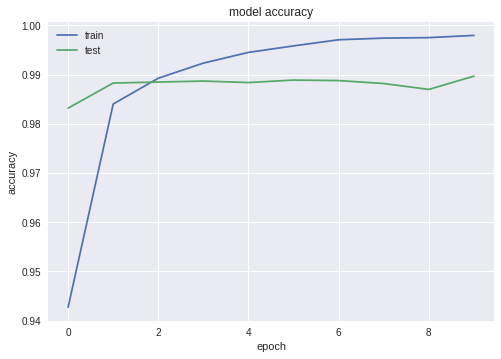

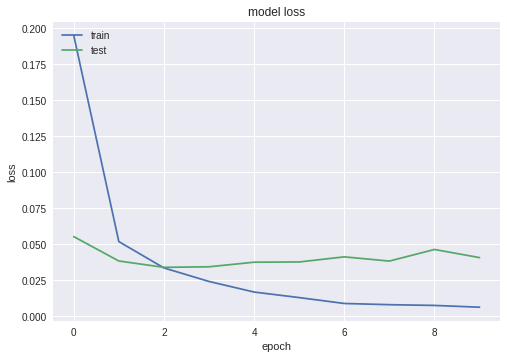

In [0]:
import matplotlib.pyplot as plt
# TAKEN FROM https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()